<a href="https://colab.research.google.com/github/3marsaied/GP/blob/main/Generator_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:

!pip install --upgrade tensorflow
!pip install --upgrade keras
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-

In [2]:
!pwd
!ls
import os
import pandas as pd
import pydicom as dicom
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split

/content
sample_data


In [5]:
df_high_res=os.listdir(r"/content/drive/MyDrive/GP_datasets/HighRes_CB_CT")
df_low_res=os.listdir(r"/content/drive/MyDrive/GP_datasets/LowRes_CB_CT")


In [ ]:
df_high_res[0:5]

In [ ]:
df_low_res[0:5]

In [6]:
high_res_path="/content/drive/MyDrive/GP_datasets/HighRes_CB_CT/"
low_res_path="/content/drive/MyDrive/GP_datasets/LowRes_CB_CT/"

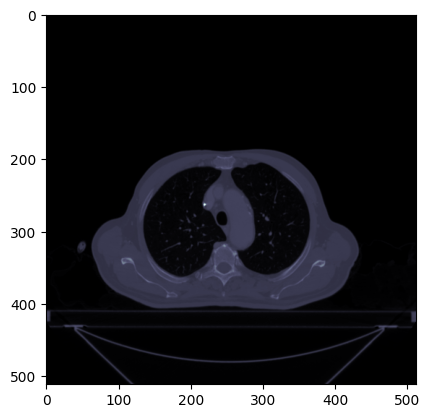

In [ ]:

# specify your image path
image_ex = '1-025.dcm'
ds = dicom.dcmread(high_res_path+ image_ex)

plt.imshow(ds.pixel_array, cmap=plt.cm.bone)


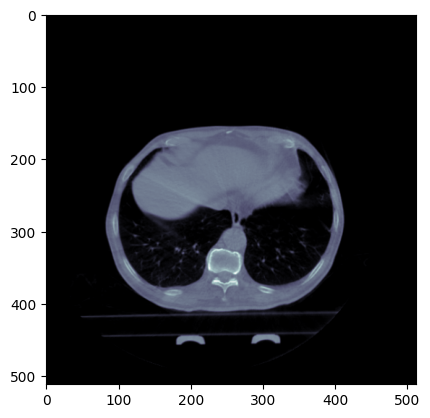

In [ ]:
image_ex = '1-100.dcm'
ds = dicom.dcmread(low_res_path+ image_ex)

plt.imshow(ds.pixel_array, cmap=plt.cm.bone)

In [ ]:
data_high_res=[]
data_low_res=[]
data=[]
count=0
image0=[]
for img_file in df_high_res[90:170] :
  # count=count+1

  image =dicom.dcmread(high_res_path+img_file)
  image=image.pixel_array
  image = image.reshape(512, 512, 1)
  image = image.astype(np.float32)

  # if(count==1):
  #   image0=image
  image=np.array(image)
  data_high_res.append(image)

  #data_high_res.append(image0)

print(data_high_res[0].shape)

for img_file in df_low_res[90:170]:
  image = dicom.dcmread(low_res_path + img_file)

  image=image.pixel_array
  image = image.reshape(512, 512, 1)
  image = image.astype(np.float32)
  image=np.array(image)
  data_low_res.append(image)

print(data_low_res[0])



(512, 512, 1)
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [7]:
data_high_res=[]
data_low_res=[]
data=[]
count=0
image0=[]
for img_file in df_high_res[90:170] :
  # count=count+1

  image =dicom.dcmread(high_res_path+img_file)
  image=image.pixel_array
  image = image.reshape(512, 512, 1)
  image = image.astype(np.float32)
  image = image[100:-100, 100:-100, :]

  # if(count==1):
  #   image0=image
  image=np.array(image)
  data_high_res.append(image)

  #data_high_res.append(image0)

print(data_high_res[0].shape)

for img_file in df_low_res[90:170]:
  image = dicom.dcmread(low_res_path + img_file)

  image=image.pixel_array
  image = image.reshape(512, 512, 1)
  image = image.astype(np.float32)
  image = image[100:-100, 100:-100, :]
  image=np.array(image)
  data_low_res.append(image)

print(data_low_res[0])

(312, 312, 1)
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [8]:
import tensorflow as tf
from tensorflow import keras
generator = keras.Sequential([
    # Input layer with the shape of your low-resolution images
    tf.keras.layers.InputLayer(input_shape=(312, 312, 1)),

    # Encoder part (downsampling)
    tf.keras.layers.Conv2D(64, kernel_size=4, strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=4, strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=4, strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    # Decoder part (upsampling)
    tf.keras.layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    # Output layer with sigmoid activation for grayscale image generation
    tf.keras.layers.Conv2D(1, kernel_size=7, activation='sigmoid', padding='same')
])
generator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 156, 156, 64)        │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 156, 156, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 78, 78, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 78, 78, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 39, 39, 256)         │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 39, 39, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 78, 78, 256)         │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 78, 78, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 156, 156, 128)       │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 156, 156, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 312, 312, 64)        │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 312, 312, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 312, 312, 1)         │           3,137 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,367,937 (9.03 MB)

 Trainable params: 2,366,145 (9.03 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [13]:
discriminator = keras.Sequential([
    # Input layer with the shape of your high-resolution images (512x512x1)
    tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, input_shape=(312, 312, 1), padding='same', activation='relu'),

    # Downsample
    tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),

    # Further downsampling and flattening to feed into a dense output layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# #tf.keras.layers.UpSampling2D(
# #tf.keras.layers.Conv2D(

# # Input layer
# inputs = tf.keras.Input(shape=(512, 512, 1))

# # Encoder
# conv1 = tf.keras.layers.Conv2D(32, (4, 4), strides=(1, 1), padding="same", activation="relu")(inputs)
# conv1 = tf.keras.layers.Conv2D(32, (4, 4), strides=(2, 2), padding="same", activation="relu")(conv1)

# conv2 = tf.keras.layers.Conv2D(64, (4, 4), strides=(1, 1), padding="same", activation="relu")(conv1)
# conv2 = tf.keras.layers.Conv2D(64, (4, 4), strides=(2, 2), padding="same", activation="relu")(conv2)

# conv3 = tf.keras.layers.Conv2D(128, (4, 4), strides=(1, 1), padding="same", activation="relu")(conv2)
# conv3 = tf.keras.layers.Conv2D(128, (4, 4), strides=(2, 2), padding="same", activation="relu")(conv3)

# conv4 = tf.keras.layers.Conv2D(256, (4, 4), strides=(1, 1), padding="same", activation="relu")(conv3)
# conv4 = tf.keras.layers.Conv2D(256, (4, 4), strides=(2, 2), padding="same", activation="relu")(conv4)

# conv5 = tf.keras.layers.Conv2D(512, (4, 4), strides=(1, 1), padding="same", activation="relu")(conv4)
# conv5 = tf.keras.layers.Conv2D(512, (4, 4), strides=(2, 2), padding="same", activation="relu")(conv5)

# # Decoder
# up5 = tf.keras.layers.UpSampling2D((2, 2))(conv5)
# up5 = tf.keras.layers.Conv2D(256, (4, 4), strides=(1, 1), padding="same", activation="relu")(up5)
# up5 = tf.keras.layers.concatenate([up5, conv4], axis=-1)  # Skip connection
# up5 = tf.keras.layers.Conv2D(256, (4, 4), strides=(1, 1), padding="same", activation="relu")(up5)

# up4 = tf.keras.layers.UpSampling2D((2, 2))(up5)
# up4 = tf.keras.layers.Conv2D(128, (4, 4), strides=(1, 1), padding="same", activation="relu")(up4)
# up4 = tf.keras.layers.concatenate([up4, conv3], axis=-1)  # Skip connection
# up4 = tf.keras.layers.Conv2D(128, (4, 4), strides=(1, 1), padding="same", activation="relu")(up4)

# up3 = tf.keras.layers.UpSampling2D((2, 2))(up4)
# up3 = tf.keras.layers.Conv2D(64, (4, 4), strides=(1, 1), padding="same", activation="relu")(up3)
# up3 = tf.keras.layers.concatenate([up3, conv2], axis=-1)  # Skip connection
# up3 = tf.keras.layers.Conv2D(64, (4, 4), strides=(1, 1), padding="same", activation="relu")(up3)

# up2 = tf.keras.layers.UpSampling2D((2, 2))(up3)
# up2 = tf.keras.layers.Conv2D(32, (4, 4), strides=(1, 1), padding="same", activation="relu")(up2)
# up2 = tf.keras.layers.concatenate([up2, conv1], axis=-1)  # Skip connection
# up2 = tf.keras.layers.Conv2D(32, (4, 4), strides=(1, 1), padding="same", activation="relu")(up2)

# up1 = tf.keras.layers.UpSampling2D((2, 2))(up2)
# up1 = tf.keras.layers.Conv2D(32, (4, 4), strides=(1, 1), padding="same", activation="relu")(up1)  # conv23
# up1 = tf.keras.layers.Conv2D(1, (1, 1), strides=(1, 1), padding="same", activation=None)(up1)  # conv24

# # Output with tanh activation
# outputs = tf.keras.layers.Activation(tf.nn.tanh)(up1)

# # Create the model
# model = tf.keras.Model(inputs=inputs, outputs=outputs)

# #REMOVE NEXT LINE WHEN INCORPORATING DISCRIMINATOR
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# #model.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0: D Loss Real: 0.0, D Loss Fake: 0.003000430064275861, G Loss: 3.4606852531433105
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


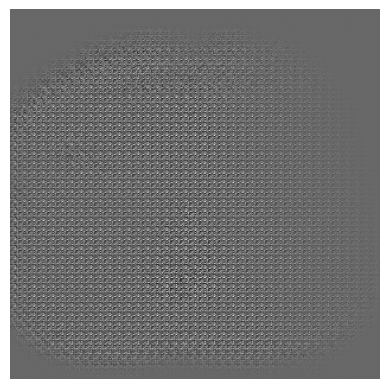

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
Epoch 1: D Loss Real: 0.0, D Loss Fake: 0.003032604232430458, G Loss: 3.340947151184082
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step


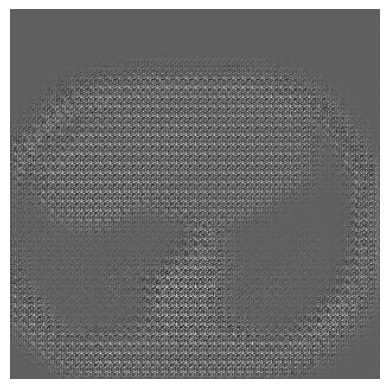

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
Epoch 2: D Loss Real: 0.0, D Loss Fake: 0.003096541855484247, G Loss: 3.254413604736328
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


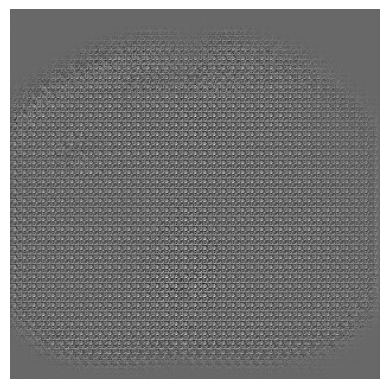

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Epoch 3: D Loss Real: 0.0, D Loss Fake: 0.0030835564248263836, G Loss: 3.1787519454956055
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


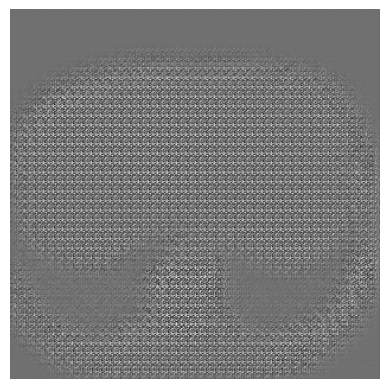

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
Epoch 4: D Loss Real: 0.0, D Loss Fake: 0.0031065812800079584, G Loss: 3.115534782409668
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


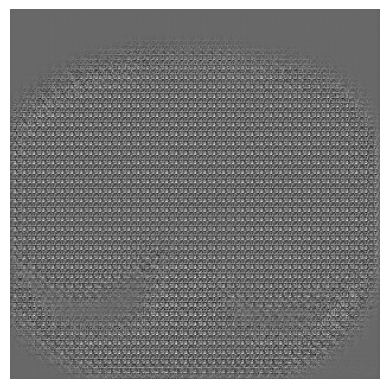

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Epoch 5: D Loss Real: 0.0, D Loss Fake: 0.003093432169407606, G Loss: 3.0652074813842773
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


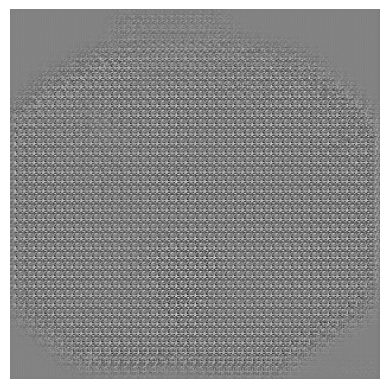

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Epoch 6: D Loss Real: 0.0, D Loss Fake: 0.003105318872258067, G Loss: 3.023435592651367
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


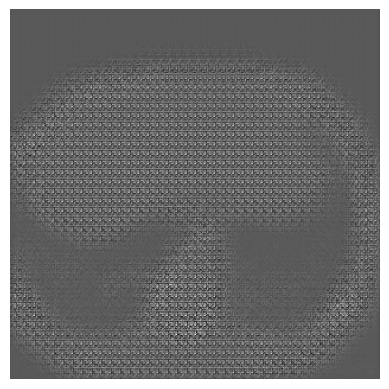

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
Epoch 7: D Loss Real: 0.0, D Loss Fake: 0.0030983667820692062, G Loss: 2.987964630126953
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


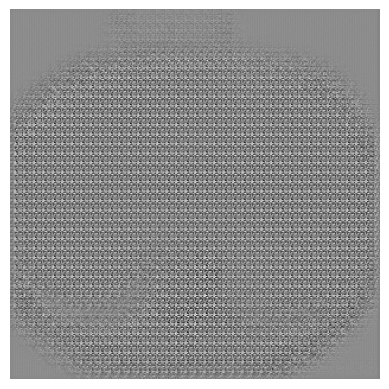

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
Epoch 8: D Loss Real: 0.0, D Loss Fake: 0.003116331994533539, G Loss: 2.9384233951568604
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


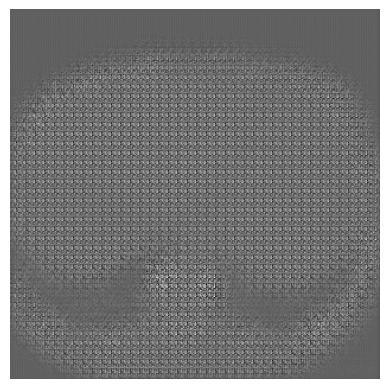

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
Epoch 9: D Loss Real: 0.0, D Loss Fake: 0.0031264396384358406, G Loss: 2.9161980152130127
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


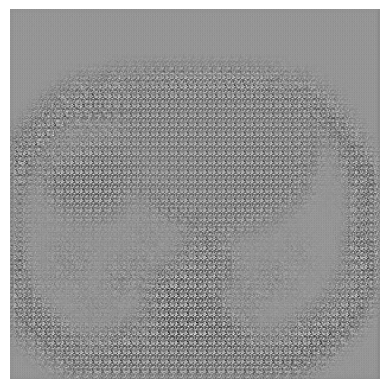

In [27]:
import random


epochs = 10
batch_size = 8

for epoch in range(epochs):
    ############################
    # 1. Train the Discriminator
    ############################

    idx = np.random.randint(0, len(data_high_res), batch_size) #Ensure length consistency
    data_high_res_arr = np.array(data_high_res)
    real_images = data_high_res_arr[idx]  # Get batch-sized real images
    #num_images = 8  # Number of random images to select

    # Create a list to hold the 8 arrays
    random_low_res_images_list = []

    for _ in range(batch_size):
        # Get a random index
        random_index = random.randint(0, len(data_low_res) - 1)

        # Select the image and add it as a separate array to the list
        random_low_res_images_list.append(np.expand_dims(data_low_res[random_index], axis=0))
    generated_images = generator.predict(random_low_res_images_list)

    # Labels for generated and real data
    fake_labels = np.zeros((batch_size, 1))
    real_labels = np.ones((batch_size, 1))

    # Train the Discriminator (real classified as ones and generated as zeros)
    discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['accuracy'])

    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)


#######################################################################

    discriminator.trainable = False

    # Combined GAN model with CNN
    gan_input = tf.keras.layers.Input(shape=(312,312,1))
    gan_output = discriminator(generator(gan_input))
    gan_cnn = keras.Model(gan_input, gan_output)
    gan_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), loss='binary_crossentropy')

    #################################
    # 2. Train the Generator (via GAN)
    #################################

    valid_labels = np.ones((8, 1))  # Create labels for the batch


    random_indices = random.sample(range(batch_size), batch_size)
    # Create an empty list to store the selected low-res images
    low_res_batch = []    # Iterate through random_indices and select images
    for index in random_indices:
        low_res_batch.append(data_low_res[index])
    # Convert low_res_batch to a NumPy array
    low_res_batch = np.array(low_res_batch)

    g_loss = gan_cnn.train_on_batch(low_res_batch, valid_labels)  # Train with all 8 arrays

    # Plot the progress
    print(f"Epoch {epoch}: D Loss Real: {d_loss_real[0]}, D Loss Fake: {d_loss_fake[0]}, G Loss: {g_loss}")

    random_index = random.randint(0, len(data_low_res) - 1)
    input= np.expand_dims(data_low_res[random_index], axis=0)
    # Display generated image for every epoch
    generated_image = generator.predict(input)
    plt.imshow(generated_image[0, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
# trial 2
# from tensorflow.keras.optimizers import Adam

# model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
#generator.compile(optimizer='adam', loss='mse', metrics=['mae'])
data_low_res = np.array(data_low_res)
data_high_res = np.array(data_high_res)

X_train, X_test, y_train, y_test= train_test_split(data_low_res, data_high_res, test_size=0.2, random_state = 2)



X_train = X_train / 127.5 - 1  # Assuming pixel values are originally in the range 0-255
y_train = y_train / 127.5 - 1


# Instead of using tf.data.Dataset, pass NumPy arrays directly to model.fit
history = model.fit(
    data_high_res,  # Pass the training data as a NumPy array
    data_high_res,  # Pass the training labels as a NumPy array
    epochs=10,  # Number of training epochs
    batch_size=8,  # Batch size
    validation_split=0.2,
    shuffle=False
    # Fraction of data for validation
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 418ms/step - loss: 726544.5625 - mae: 703.5786 - val_loss: 637078.5625 - val_mae: 646.0654
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - loss: 729247.3750 - mae: 705.5629 - val_loss: 637077.3750 - val_mae: 646.0585
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - loss: 726207.1250 - mae: 703.3582 - val_loss: 637076.0000 - val_mae: 646.0524
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - loss: 726203.3125 - mae: 703.3330 - val_loss: 637064.1875 - val_mae: 646.0214
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - loss: 726203.2500 - mae: 703.3301 - val_loss: 637000.2500 - val_mae: 645.9645
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - loss: 725745.8750 - mae: 703.5381 - val_loss: 636918.8750 - val_mae: 645.9066
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - loss: 729232.5625 - mae: 705.4886 - val_loss: 636838.7500 - val_mae: 645.8574
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - loss: 726203.1250 - mae: 703.3280 - v

In [ ]:
# X_train = X_train / 127.5 - 1  # Assuming pixel values are originally in the range 0-255
# y_train = y_train / 127.5 - 1

# X_train = np.stack(data_low_res)
# y_train = np.stack(data_high_res)
# # ... (You may or may not use train_test_split on X_train, y_train if needed)


# # Convert to TensorFlow tensors
# X_train = tf.convert_to_tensor(X_train)
# y_train = tf.convert_to_tensor(y_train)
# # ... (if you do train_test_split also convert X_test,y_test to tensors)

# # Fit the model
# history = model.fit(
#     y_train,  # Input data (single 4D tensor with multiple images)
#     y_train,  # Target data (single 4D tensor with multiple images)
#     epochs=10,  # Number of training epochs
#     batch_size=8,
#      validation_split=0.2# Batch size for training
# )




Epoch 1/10
6/8 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step - loss: 254820.0000 - mae: 261.8999

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


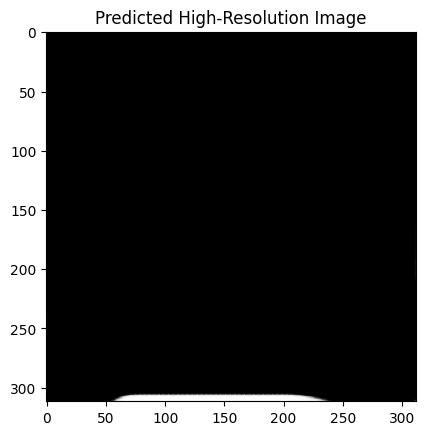

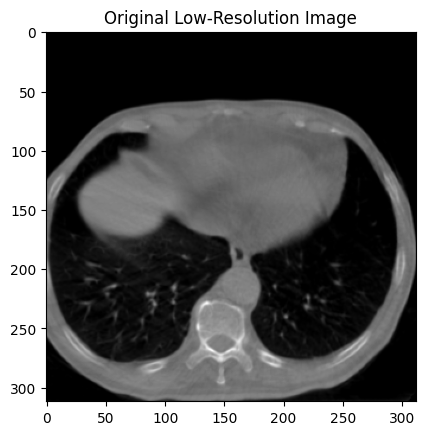

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train is already loaded and preprocessed

# Get the first image from X_train
input_image = X_train[40]

# Make a prediction using the model
predicted_high_res = model.predict(np.expand_dims(input_image, axis=0))

# Squeeze the predicted_high_res to remove the extra dimension
predicted_high_res = np.squeeze(predicted_high_res)

# Display the predicted image using imshow
plt.imshow(predicted_high_res, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title("Predicted High-Resolution Image")
plt.show()

# Optionally, display the original low-resolution image for comparison
plt.imshow(np.squeeze(input_image), cmap='gray')
plt.title("Original Low-Resolution Image")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


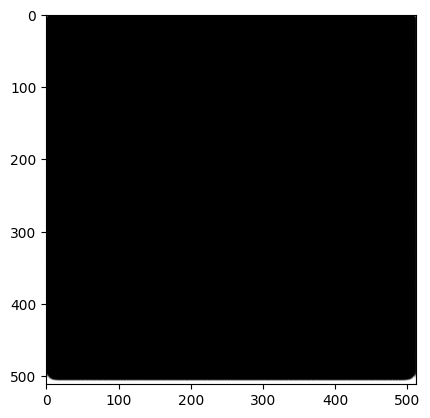

In [ ]:
random_array = np.random.rand(512, 512, 1)
random_array = np.expand_dims(random_array, axis=0)
predicted_high_res = model.predict(random_array)

# Squeeze the predicted_high_res to remove the extra dimension
predicted_high_res = np.squeeze(predicted_high_res)

# Display the image using imshow
plt.imshow(predicted_high_res, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.show()


